In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y= make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [4]:
X

array([[ 1.09970625, -0.29359959],
       [ 0.07753259, -0.21067483],
       [-0.22218403, -1.10668   ],
       ...,
       [ 0.21005295,  0.32137997],
       [-0.40381143, -0.2425347 ],
       [ 0.72360226, -1.58991474]])

In [5]:
y

array([ 2.85232109e+01, -4.59321091e+00, -6.63309710e+01, -1.22165075e+02,
        5.35395394e+01, -2.65636213e+01,  1.24416643e+01,  1.78226659e+01,
       -7.78019315e+01, -3.27887064e+00, -3.76912196e+01,  3.30177105e+01,
       -1.19784279e+02,  9.20736556e+01,  2.87298395e+01, -4.05077479e+01,
       -7.69431854e+00, -2.67177453e+01, -2.31181787e+01,  7.10655691e+01,
        1.39599760e+01,  7.24664219e+01, -2.70108785e+01,  9.45480348e+00,
        4.04884124e+01, -8.95464767e+01,  1.44858030e+02,  1.18726219e+01,
       -7.71033275e+01,  5.08380769e-01, -6.50933602e+01, -5.18770161e+01,
        1.17076276e+02, -4.70906747e+01,  5.70813724e+01, -6.52404519e+01,
       -1.11904026e+02, -2.34565775e+01, -2.42182459e+01,  7.07645869e+01,
        3.92549911e+01, -9.64884513e+00, -2.23626085e+02, -5.28690173e+01,
       -1.84949268e+02,  4.98789365e+01, -3.19269018e+01, -3.34345358e+01,
        2.22709175e+01, -1.49337834e+01,  5.56622695e+01,  2.52710720e+01,
        9.99798006e+01, -

In [6]:
pd.DataFrame(X)[0]

0      1.099706
1      0.077533
2     -0.222184
3     -2.198390
4     -0.280386
         ...   
995   -0.870235
996    1.713900
997    0.210053
998   -0.403811
999    0.723602
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

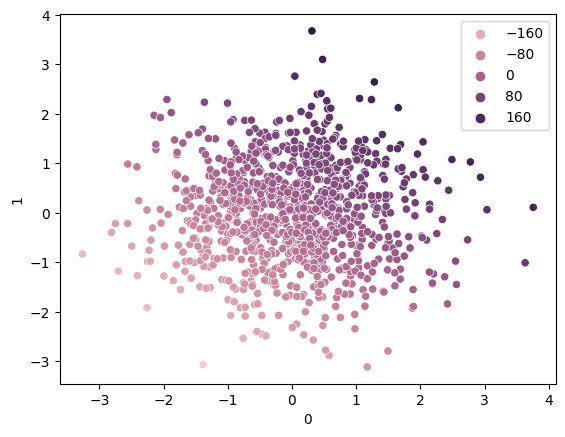

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [12]:
from sklearn.svm import SVR

In [13]:
svr=SVR(kernel='linear')

In [14]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [15]:
svr.coef_

array([[42.42026844, 52.33917511]])

In [16]:
## prediction
y_pred=svr.predict(X_test)

In [17]:
y_pred

array([-7.16138267e+01, -4.65035022e+01, -1.03905457e+02,  4.96834266e+01,
       -1.34684499e+02,  9.17837657e+01,  1.05125921e+01, -1.13712336e+01,
        3.42132211e+01,  5.91639011e+00, -2.31724453e+01, -4.70223031e+01,
        3.80338574e+01, -3.39536175e+01, -5.96139772e+01, -5.63886948e+01,
        8.77018246e+00, -3.16807427e+00,  5.60362717e+00, -1.21327428e+02,
        1.96519686e+01, -7.13652844e+01,  8.40454232e+01, -1.42804766e+01,
        6.32692844e+01, -7.81385029e+00, -9.12042363e+01,  4.69617294e+01,
       -2.21893512e+01,  4.30150045e+01,  1.16276809e+02,  2.80367965e+01,
       -1.87952189e+01, -3.46294667e+01, -3.64951740e+01, -2.18671740e+01,
       -9.34465993e+00,  8.38163597e+01,  1.33559947e+02,  7.15800330e+01,
       -2.22939042e+01, -8.28531100e+01,  2.47996518e+01,  7.94487999e+01,
       -1.01885539e+02, -2.61335490e+01,  4.20063031e+01, -1.87542279e+01,
        1.36347174e+01,  7.80211024e+01,  8.27557740e+00, -5.33017820e+01,
        2.93737358e+01,  

In [18]:
from sklearn.metrics import r2_score

In [19]:
print(r2_score(y_test, y_pred)) # to check accuracy

0.9983655305478871


## Hyperparameter tuning with SVR

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
# defining parameter range
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['linear'],
           'epsilon':[0.1, 0.2,0.3]}

In [24]:
grid=GridSearchCV(SVR(),param_grid=param_grid, scoring='neg_mean_squared_error', refit=True,cv=5,verbose=3)

In [25]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-376.949 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-399.953 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-401.885 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-509.330 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-469.336 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-376.949 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-399.953 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-401.885 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-509.330 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-469.336 total time=   0.0s
[CV 1/5]

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [26]:
grid.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [27]:
## prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.998364307862634
